In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load data
df = pd.read_csv('dataset_buys _comp.csv')  # Sesuaikan path
display(df.head())

# Cek info data
df.info()

# Lihat nilai unik
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


,Age,Income,Student,Credit_Rating,Buys_Computer
0,Tua,Tinggi,Ya,Buruk,0
1,Paruh Baya,Tinggi,Ya,Baik,1
2,Paruh Baya,Rendah,Tidak,Buruk,1
3,Tua,Rendah,Tidak,Baik,1
4,Tua,Rendah,Ya,Baik,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            1000 non-null   object
 1   Income         1000 non-null   object
 2   Student        1000 non-null   object
 3   Credit_Rating  1000 non-null   object
 4   Buys_Computer  1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
Age: ['Tua' 'Paruh Baya' 'Muda']
Income: ['Tinggi' 'Rendah' 'Sedang']
Student: ['Ya' 'Tidak']
Credit_Rating: ['Buruk' 'Baik']
Buys_Computer: [0 1]


In [9]:
# Cek missing values
print("Missing values per kolom:\n", df.isnull().sum())

# Drop jika ada yang null
df = df.dropna()

# Encode semua fitur kategorikal
df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Pisah fitur dan target
X = df_encoded.drop('Buys_Computer', axis=1)
y = df_encoded['Buys_Computer']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)  # stratify agar distribusi label seimbang


Missing values per kolom:
 Age              0
Income           0
Student          0
Credit_Rating    0
Buys_Computer    0
dtype: int64


In [10]:
# Set parameter tuning
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Latih model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)


Best Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [11]:
# Evaluasi model terbaik
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.81

Confusion Matrix:
 [[ 56  10]
 [ 28 106]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.85      0.75        66
           1       0.91      0.79      0.85       134

    accuracy                           0.81       200
   macro avg       0.79      0.82      0.80       200
weighted avg       0.83      0.81      0.81       200



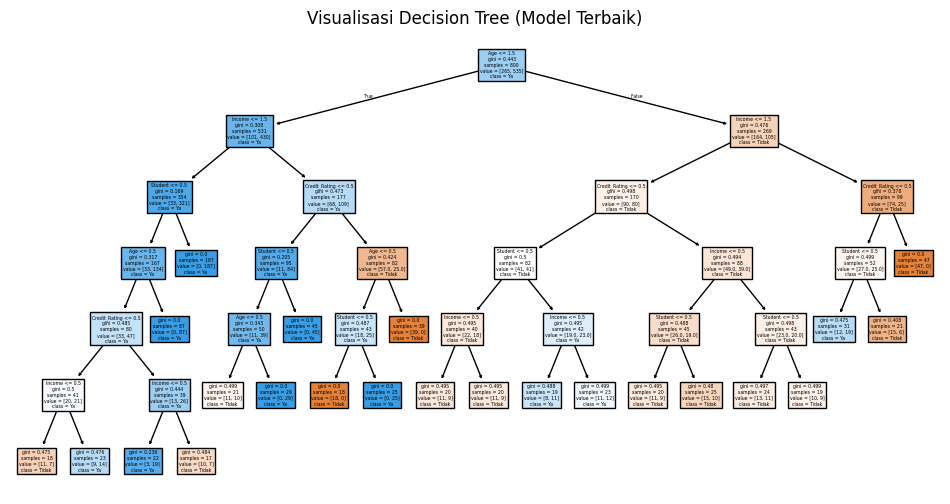

In [12]:
plt.figure(figsize=(12, 6))
plot_tree(best_model, feature_names=X.columns, class_names=['Tidak', 'Ya'], filled=True)
plt.title("Visualisasi Decision Tree (Model Terbaik)")
plt.show()


In [13]:
df['AgeGroup'] = df['Age'].map({
    'youth': 0,
    'middle_aged': 1,
    'senior': 2
})

df['IncomeLevel'] = df['Income'].map({
    'low': 0,
    'medium': 1,
    'high': 2
})


In [14]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}


In [15]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_

# Evaluasi model terbaik
y_pred_best = best_tree.predict(X_test)
print("Best Accuracy:", accuracy_score(y_test, y_pred_best))


Best Accuracy: 0.81


In [16]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_

# Evaluasi model terbaik
y_pred_best = best_tree.predict(X_test)
print("Best Accuracy:", accuracy_score(y_test, y_pred_best))


Best Accuracy: 0.81


In [ ]:
plt.figure(figsize=(18,10))
plot_tree(best_tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Optimized Decision Tree")
plt.show()


Age              0
Income           0
Student          0
Credit_Rating    0
Buys_Computer    0
dtype: int64


c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2400 fits failed out of a total of 9600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1172 fits failed with the following error:
Traceback (most recent call last):
  File "c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, 

Best Params: {'classifier__criterion': 'gini', 'classifier__max_depth': 7, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__splitter': 'best'}
Accuracy: 0.81
Confusion Matrix:
 [[65  6]
 [32 97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.92      0.77        71
           1       0.94      0.75      0.84       129

    accuracy                           0.81       200
   macro avg       0.81      0.83      0.81       200
weighted avg       0.85      0.81      0.81       200



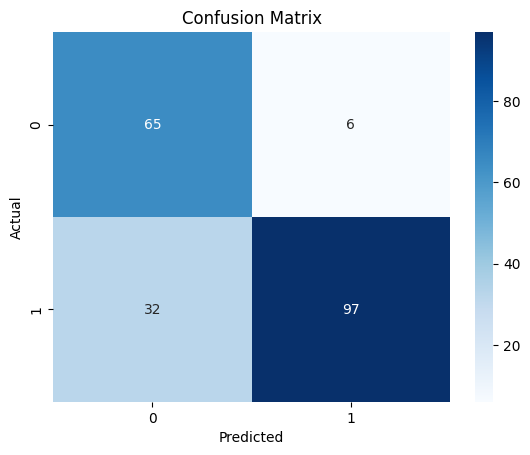

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("dataset_buys _comp.csv")

# Pisahkan fitur dan target
X = df.drop("Buys_Computer", axis=1)
y = df["Buys_Computer"]

# Cek missing values
print(df.isnull().sum())  # Check for missing values in the dataset

# Identifikasi kolom kategorikal
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# One-hot encoding untuk fitur kategorikal
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)]
)

# Pipeline model Decision Tree
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

# Parameter grid untuk tuning
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, None, 15, 20],
    'classifier__min_samples_split': [2, 4, 6, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 4, 6],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_features': ['sqrt', 'log2', None]  # Removed 'auto'
}


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Model terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi
print("Best Params:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Heatmap Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
